In [1]:
from module.cleverhans_model_v2 import AttackModel, Attacker, CleverhansModel
from module.utils import * 
from module.gs_mim import GradSmoothMomentumIterativeMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
batch_shape = (110, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

In [3]:
name = 'inception_v1'
A = Attacker(batch_shape, 110, name=name)

{'ep_ratio': 0.1, 'nb_iter': 100, 'decay_factor': 1.0, 'y': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'eps': 0.2, 'eps_iter': 0.002, 'clip_min': -1.0, 'clip_max': 1.0}


D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\gs_mim.py:202: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 2010.93 s
inception_v1 predict runs: 13.73 s
inception_v1 predict accuracy : 0.0
inception_v1 adv accuracy : 0.0, L2 13.97219574781933


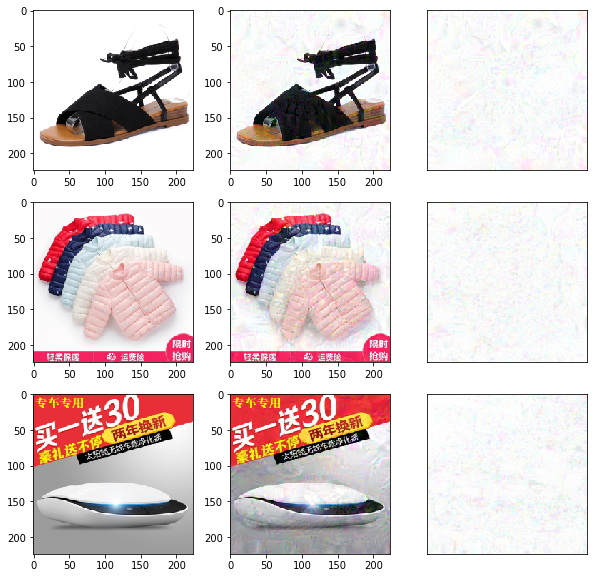

In [4]:
attack_params = {"ep_ratio": 0.1, "nb_iter": 100, "decay_factor": 1.0, "y": A.y}
Xadv, ypred = A.attack(X, Y, GradSmoothMomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

In [5]:
name = 'resnetv1_50'
A = Attacker(batch_shape, 110, name=name)
ypred,accuracy = A.predict(Xadv,Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 19.86 s
resnetv1_50 predict accuracy : 0.3545454442501068


In [6]:
name = 'vgg_16'
A = Attacker(batch_shape, 110, name=name)
ypred,accuracy = A.predict(Xadv,Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
vgg_16 predict runs: 178.01 s
vgg_16 predict accuracy : 0.5
